<a href="https://colab.research.google.com/github/roya1988/The-Sparks-Foundation-Internship-ML/blob/main/TSF_Internship_task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Roya Afshar**

Prediction using unsupervised learning

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn import datasets

iris = datasets.load_iris()
features = iris.data
true_labels = iris.target
print(features.shape)
print(true_labels.shape)
features[0]

(150, 4)
(150,)


array([5.1, 3.5, 1.4, 0.2])

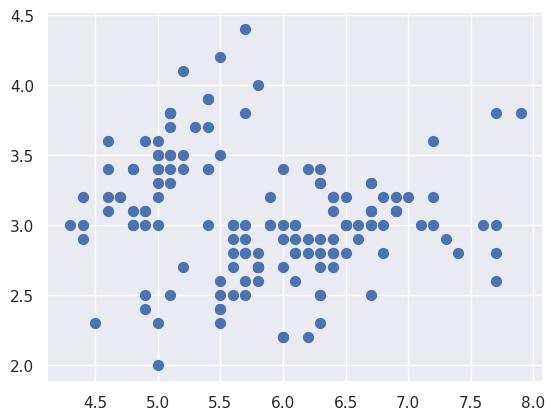

In [4]:
#plot features
plt.scatter(features[:, 0], features[:, 1], s=50);

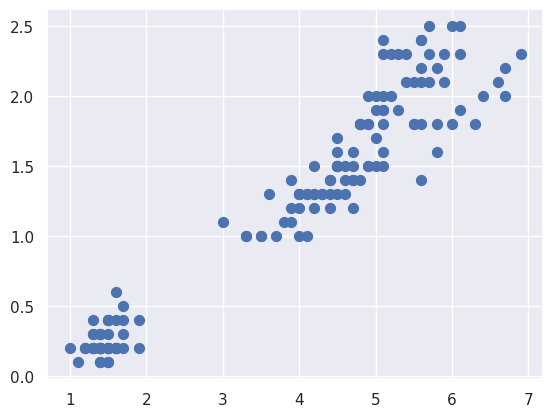

In [5]:
plt.scatter(features[:, 2], features[:, 3], s=50);

In [6]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [7]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
    )

In [8]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [9]:
# The lowest SSE value
kmeans.inertia_

139.82049635974982

In [10]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[ 1.13597027,  0.08842168,  0.99615451,  1.01752612],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [-0.05021989, -0.88337647,  0.34773781,  0.2815273 ]])

In [11]:
# The number of iterations required to converge
kmeans.n_iter_

5

In [12]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [14]:
y_kmeans = kmeans.predict(scaled_features)

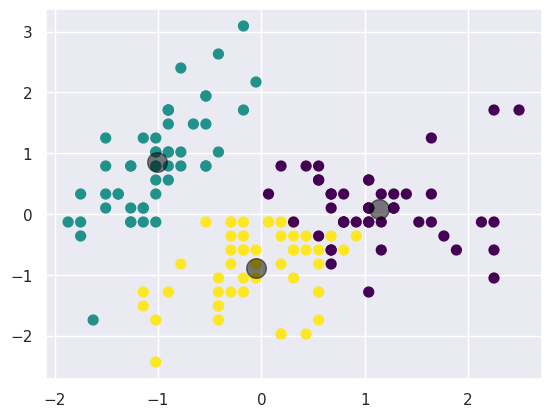

In [18]:
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()

In [15]:
kmeans_kwargs = {
    "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

In [16]:
sse = []
for k in range(1, 11):
     kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
     kmeans.fit(scaled_features)
     sse.append(kmeans.inertia_)

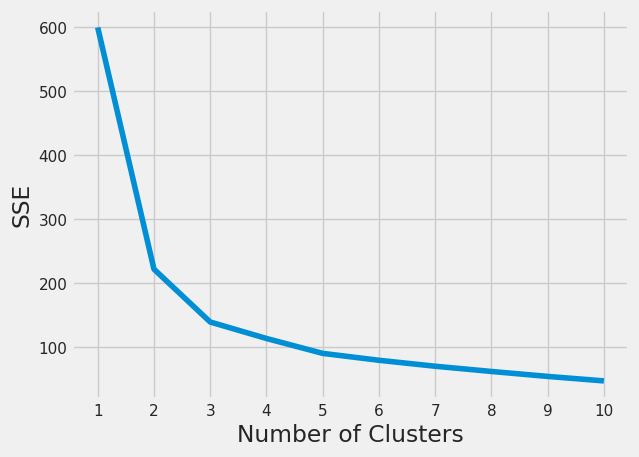

In [17]:
#visualization of optimum number of clusters
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel('SSE')
plt.show()

In [18]:
pip install kneed

In [19]:
from kneed import DataGenerator, KneeLocator

In [25]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing")
#k1.elbow

In [27]:
kl.elbow

3